In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from jormund import *
setup_plots()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Original:

In [14]:
# Generate synthetic residuals data for a stock price
np.random.seed(0)
errors = np.random.normal(0, 1, 1000)
stock_residuals = pd.Series(errors).cumsum()  # cumulative sum to simulate residuals

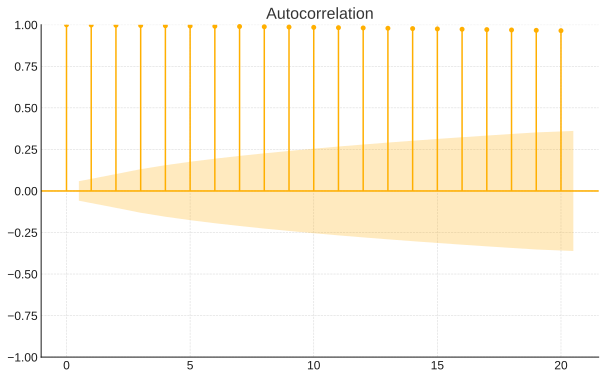

In [15]:
plot_acf(stock_residuals, lags=20, alpha=0.063)
plt.show()

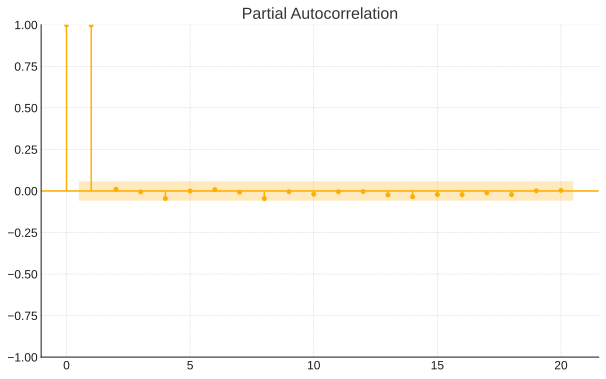

In [16]:
plot_pacf(stock_residuals, lags=20, alpha=0.063)
plt.show()

In [17]:
# Perform ADF test on stationary data
adf_result = adfuller(stock_residuals)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -0.5437433594783736
p-value: 0.8831939389121154


In [18]:
# Fit AR(2) model (order 2 for AR, 0 for MA)
model_ar = ARIMA(stock_residuals, order=(2, 0, 0))
ar_fit = model_ar.fit()

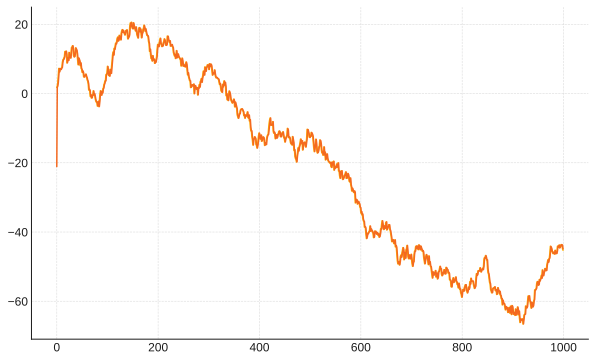

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1408.570
Date:                Wed, 13 Nov 2024   AIC                           2825.139
Time:                        11:00:57   BIC                           2844.770
Sample:                             0   HQIC                          2832.600
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0976     28.145     -0.750      0.453     -76.262      34.066
ar.L1          0.9751      0.032     30.785      0.000       0.913       1.037
ar.L2          0.0243      0.032      0.767      0.4

In [19]:
# Plot original data and forecast
plt.plot(stock_residuals, label="Original Data")
plt.plot(ar_fit.fittedvalues, label="AR(1) Fitted Values")
plt.show()

# Display summary
print(ar_fit.summary())

# Differencing:

In [20]:
stock_residuals_diff = stock_residuals.diff().dropna() # First value is a nan

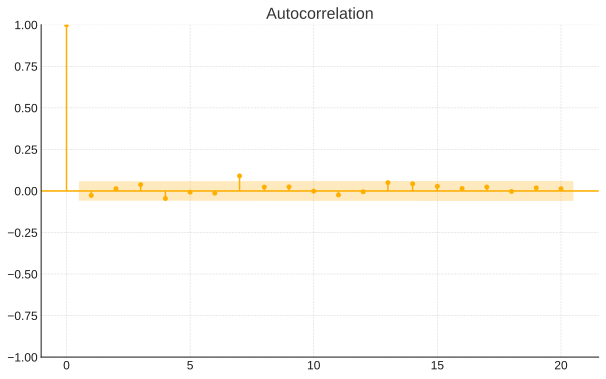

In [21]:
plot_acf(stock_residuals_diff, lags=20, alpha=0.063)
plt.show()

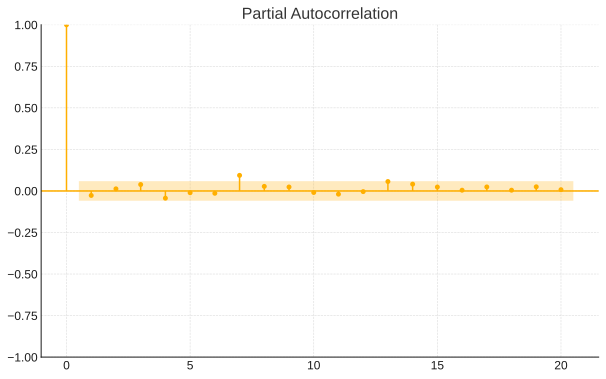

In [10]:
plot_pacf(stock_residuals_diff, lags=20, alpha=0.063)
plt.show()

In [43]:
# Perform ADF test on stationary data
adf_result = adfuller(stock_residuals_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -32.424887206916196
p-value: 0.0


In [24]:
# Fit ARIMA(13, 1, 7) model (order 13 for AR, 1 for I, 7 for MA)
model_arima = ARIMA(stock_residuals_diff, order=(13, 1, 7))
arima_fit = model_arima.fit()

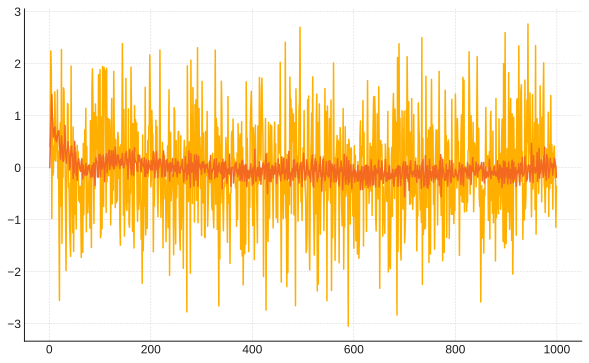

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                ARIMA(13, 1, 7)   Log Likelihood               -1394.398
Date:                Wed, 13 Nov 2024   AIC                           2830.795
Time:                        11:03:33   BIC                           2933.816
Sample:                             0   HQIC                          2869.954
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9795      0.286     -3.421      0.001      -1.541      -0.418
ar.L2         -0.7389      0.447     -1.654      0.098      -1.615       0.137
ar.L3         -1.1302      0.489     -2.312      0.0

In [25]:
# Plot original data and forecast
plt.plot(stock_residuals_diff, label="Original Data")
plt.plot(arima_fit.fittedvalues, label="ARIMA(13, 1, 7) Fitted Values")
plt.show()

# Display summary
print(arima_fit.summary())

In [34]:
ma_coeffs = ma_fit.params[-7:]

In [35]:
# Form the MA polynomial coefficients
ma_poly = np.concatenate(([1], ma_coeffs))

# Compute the roots
roots = np.roots(ma_poly)

In [36]:
roots

array([-0.95996265+0.j        , -0.51168821+1.02171454j,
       -0.51168821-1.02171454j,  0.2287734 +0.9097698j ,
        0.2287734 -0.9097698j ,  0.8765086 +0.30831989j,
        0.8765086 -0.30831989j])

In [37]:
# Check invertibility
invertible = np.all(np.abs(roots) > 1)
print('Is the model invertible?', invertible)

Is the model invertible? False


<Figure size 720x720 with 0 Axes>

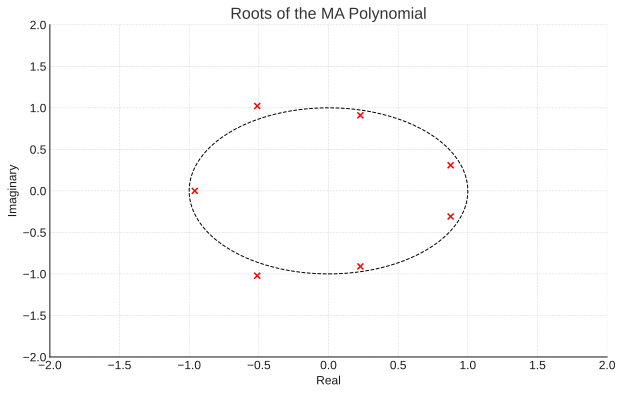

In [38]:
# Plot the roots
plt.figure(figsize=(6, 6))
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
fig, ax = plt.subplots()
ax.add_artist(unit_circle)
ax.scatter(np.real(roots), np.imag(roots), color='red')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Roots of the MA Polynomial')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.grid(True)
plt.show()